In [1]:
import sys
sys.path.append("/scratch/m/murray/dtolgay")
from tools import functions_importing_observations as func_observations

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 


In [2]:
base_dir = "/home/m/murray/dtolgay/scratch/post_processing_fire_outputs/skirt/runs_hden_radius"
galaxy_type = "firebox"
redshift = "0.0"
galaxy_name = "gal4"

In [3]:
fdir = f"{base_dir}/{galaxy_type}/z{redshift}/{galaxy_name}/voronoi_1e6"

# Read gas particles

lines = [
"L_ly_alpha",  # [erg s^-1]
"L_h_alpha", # [erg s^-1]
"L_h_beta", # [erg s^-1]
"L_co_10", # [K km s^-1 pc^2] 
"L_co_21", # [K km s^-1 pc^2] 
"L_co_32", # [K km s^-1 pc^2] 
"L_co_43", # [K km s^-1 pc^2] 
"L_co_54", # [K km s^-1 pc^2] 
"L_co_65", # [K km s^-1 pc^2] 
"L_co_76", # [K km s^-1 pc^2] 
"L_co_87", # [K km s^-1 pc^2] 
"L_13co",  # [K km s^-1 pc^2] 
"L_c2", # [erg s^-1]
"L_o3_88", # [erg s^-1]
"L_o3_5006", # [erg s^-1]
"L_o3_4958", # [erg s^-1] 
]

gas_column_names = [
"x",
"y",
"z",
"smoothing length",
"mass",
"metallicity",
"temperature",
"vx",
"vy",
"vz",
"hydrogen density",
"radius",
"sfr",
"turbulence",
"density",
"mu_theoretical",
"average_sobolev_smoothingLength",
"index",
"isrf",   
] + lines



print("Reading nearestCloudyRun")
nearestCloudyRun = pd.DataFrame(
    np.loadtxt(fname=f"{fdir}/L_line_smoothingLength_nearestNDInterpolator_flux2Luminosity.txt"),
    columns=gas_column_names
)


print("Reading linearNDInterpolator")
linearNDInterpolator = pd.DataFrame(
    np.loadtxt(fname=f"{fdir}/L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt"),
    columns=gas_column_names
)

print("Reading LichenVolumeIntegral")
volumeIntegral = pd.DataFrame(
    np.loadtxt(fname=f"{fdir}/L_line_smoothingLength_lichenTypeCalculation.txt"),
    columns=gas_column_names
)




Reading nearestCloudyRun
Reading linearNDInterpolator
Reading LichenVolumeIntegral


In [5]:
print(np.sum(linearNDInterpolator['L_co_10'])/1e9, sum(nearestCloudyRun['L_co_10'])/1e9, sum(volumeIntegral['L_co_10'])/1e9)

4.359749467189159 5.315921487122397 70.22080585458917


In [6]:
# Check where are the NaN values for the Lco calculation 
indices = ~np.isnan(linearNDInterpolator['L_co_10'])
# linearNDInterpolator[indices]['index']

print(sum(linearNDInterpolator.loc[indices, 'L_co_10'])/1e9, sum(nearestCloudyRun.loc[indices, 'L_co_10'])/1e9)

4.359749467189167 5.315921487122397


In [ ]:
interpolated_intensities = [1, 2, 5]

if np.isnan(interpolated_intensities).any():
    print(True)

# Comparing with Observations

In [7]:
################# Importing data from observations 

base_dir = "/home/m/murray/dtolgay/Observations"
    
### C0
xCOLDGASS_file_path = f"{base_dir}/xCOLDGASS_PubCat.fits"
XCOLDGASS_df = func_observations.XCold_Gass_data_reading(filedir=xCOLDGASS_file_path)

# PHIBSS2_file_path = f"{base_dir}/PHIBSS2_data.xlsx" 
# PHIBBS2_df = func_observations.PHIBSS2_data_reading(filedir=PHIBSS2_file_path)

# ALMA_2019_file_path = f"{base_dir}/ALMA_2019_data.xlsx"
# ALMA_df = func_observations.ALMA_2019_Data_Reading(filedir=ALMA_2019_file_path)

# Leroy_file_path = f"{base_dir}/Leroy_data.xlsx"
# Leroy_df, average_radius_r25_times_075_LEROY = func_observations.Leroy_Data_Reading(filedir=Leroy_file_path)




I am in the function XCold_Gass_data_reading


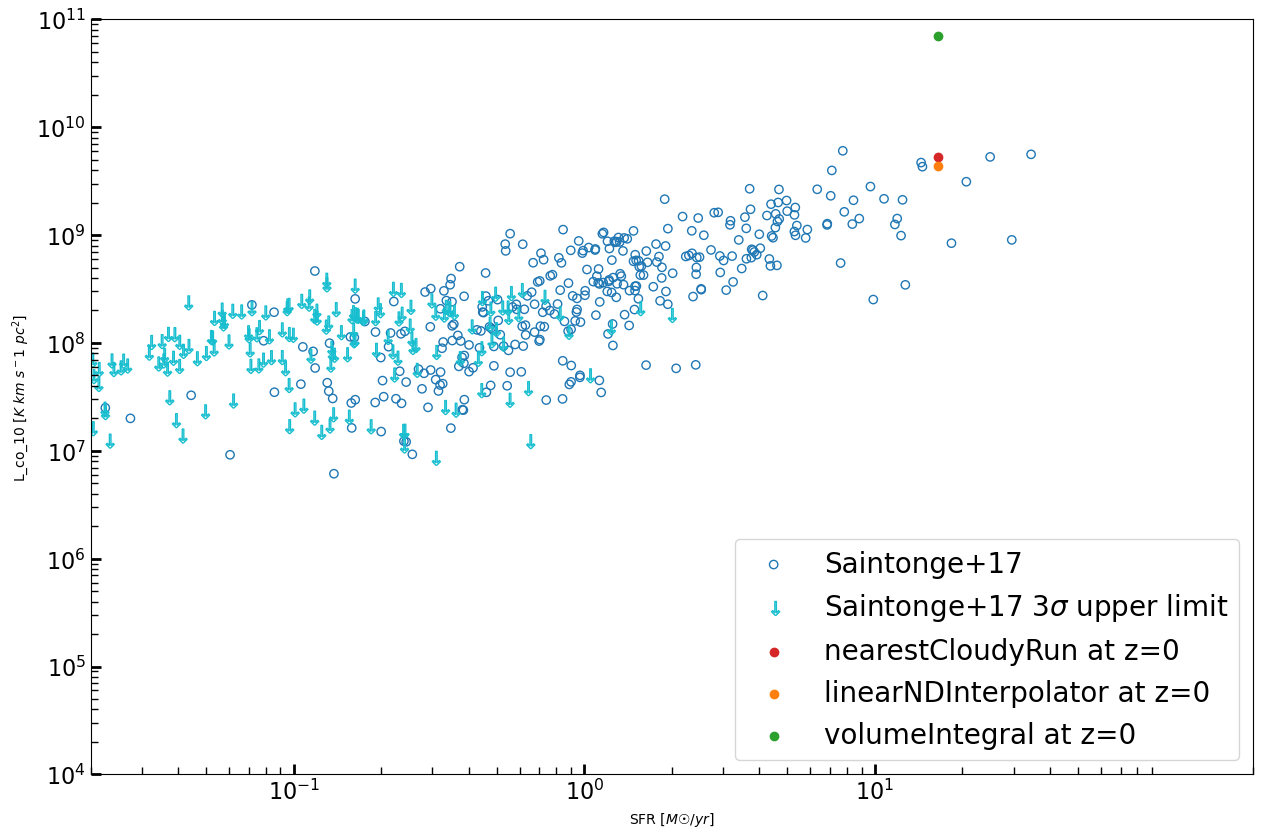

In [9]:
fig, ax = plt.subplots(figsize=(15, 10), dpi = 100, facecolor = "white")


############ xCOLDGASS
# plt.plot(XCOLDGASS_df['SFR'], XCOLDGASS_df['Lco'], '.', label = "xCOLDGASSS")
# ax.scatter(XCOLDGASS_df['SFR'], XCOLDGASS_df['Lco'], facecolors='none', edgecolors='tab:Blue')

cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Lco'], 
    facecolors='none', edgecolors='tab:blue', label="Saintonge+17"
)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Lco'], 
    marker=r"$\downarrow$", s=100, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
)


## FIRE
line_name = "L_co_10"

plt.scatter(
    sum(nearestCloudyRun["sfr"]),
    sum(nearestCloudyRun[line_name]),
    c = "tab:Red",
    label = f'nearestCloudyRun at z=0',
)


plt.scatter(
    sum(linearNDInterpolator["sfr"]),
    sum(linearNDInterpolator[line_name]),
    c = "tab:Orange",
    label = f'linearNDInterpolator at z=0',
)


plt.scatter(
    sum(volumeIntegral["sfr"]),
    sum(volumeIntegral[line_name]),
    c = "tab:Green",
    label = f'volumeIntegral at z=0',
)


## Figure options

plt.legend(fontsize="20", loc ="lower right", scatterpoints=1, numpoints=1)     

axes_number_size = 16

plt.yscale("log")
plt.xscale("log")

# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]")
plt.ylabel(fr"{line_name} [$K$ $km$ $s^{-1}$ $pc^2$]")

ymin = 1e4
ymax = 1e11
difference_in_log_space = int(np.log10(ymax/ymin))
yticks = 10**np.linspace(start = np.log10(ymin), stop = np.log10(ymax), num=difference_in_log_space+1)

plt.ylim([ymin, ymax])
plt.yticks(yticks)


plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")


